<a href="https://colab.research.google.com/github/chikakoto/facial-expression-recognition/blob/main/notebooks/1_0_RH_Initial_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Source 
https://www.kaggle.com/datasets/msambare/fer2013
https://drive.google.com/file/d/168XK2dmyPg9d6AI3cgbxhCXdIow7uVK-/view?usp=sharing 


In [2]:
!gdown --id 168XK2dmyPg9d6AI3cgbxhCXdIow7uVK- -O archive.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=168XK2dmyPg9d6AI3cgbxhCXdIow7uVK-
To: /content/archive.zip
100% 63.3M/63.3M [00:00<00:00, 74.0MB/s]


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import statsmodels.api as sm
%matplotlib inline
from statsmodels.graphics.gofplots import ProbPlot
#we will use matrix for conusion matrix 
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from struct import unpack

#logistic regression 
from sklearn.linear_model import LogisticRegression

from zipfile import ZipFile

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [6]:
#Extracting the data and saving it into list
import matplotlib.image as mpimg
from zipfile import ZipFile
import os
test_files = []
# test_labels = []
# test_images = []
test_data = []
train_dir = '/content/train'
test_dir = '/content/test'
emotions = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'sad':4, 'surprise':5, 'neutral':6}

with ZipFile('/content/archive.zip', 'r') as f:
  f.extractall()
  for dirname, dirs, filenames in os.walk(test_dir, topdown=True):
      cat = dirname.replace(test_dir, '')
      if cat != '':
          cat = cat.replace('/', '')
          for filename in filenames:
            file = os.path.join(dirname, filename)
            obj = mpimg.imread(os.path.join(dirname, filename)).flatten()
            test_data.append((file,cat, obj))
              # file = os.path.join(dirname, filename)
              # image = mpimg.imread(file).flatten()
              # test_files.append(file)
              # test_images.append(image)
              # test_labels.append(emotions[cat])


In [7]:
len(test_data)

7178

In [ ]:
test_data[1]

('/content/test/happy/PublicTest_33340944.jpg',
 'happy',
 array([ 8, 14, 15, ..., 26, 20, 15], dtype=uint8))

In [8]:
#converting out test data into a Dataframe 
import pandas as pd
df = pd.DataFrame(test_data, columns = ['file','emotion','pixels'])

In [ ]:
df.shape

(7178, 3)

In [9]:
df.head()

,file,emotion,pixels
0,/content/test/happy/PublicTest_56793753.jpg,happy,"[253, 251, 254, 250, 220, 195, 199, 201, 205, ..."
1,/content/test/happy/PublicTest_33340944.jpg,happy,"[8, 14, 15, 24, 21, 28, 73, 98, 74, 113, 136, ..."
2,/content/test/happy/PrivateTest_36531981.jpg,happy,"[63, 39, 28, 8, 15, 40, 45, 31, 32, 55, 23, 49..."
3,/content/test/happy/PublicTest_17575282.jpg,happy,"[240, 240, 239, 240, 240, 241, 241, 241, 240, ..."
4,/content/test/happy/PublicTest_36416014.jpg,happy,"[79, 92, 128, 131, 84, 80, 98, 137, 129, 139, ..."


In [23]:
# df['pixels'][0].shape
img = df['pixels'][0].reshape(48, 48)

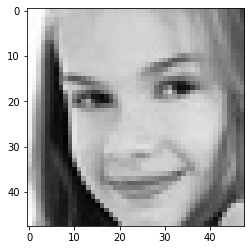

In [24]:
plt.imshow(img, cmap = 'gray')

In [12]:
df.emotion.value_counts().index

Index(['happy', 'sad', 'neutral', 'fear', 'angry', 'surprise', 'disgust'], dtype='object')

In [13]:
emotion_lables = {0:'happy', 1:'sad', 2:'neutral', 3:'fear', 4: 'angry', 5:'surprise', 6:'disgust' }

In [ ]:
df.emotion.value_counts()

happy       1774
sad         1247
neutral     1233
fear        1024
angry        958
surprise     831
disgust      111
Name: emotion, dtype: int64

In [ ]:
emotions = [0, 1, 2, 3, 4,5,6]

for i in emotions:
  data = df[df['emotion'] == i][:1]
  img = data[' pixels'].item()
  img = img.reshape(48, 48)
  plt.figure()
  plt.title(emotion_lables[i])
  plt.imshow(img, cmap = 'gray')

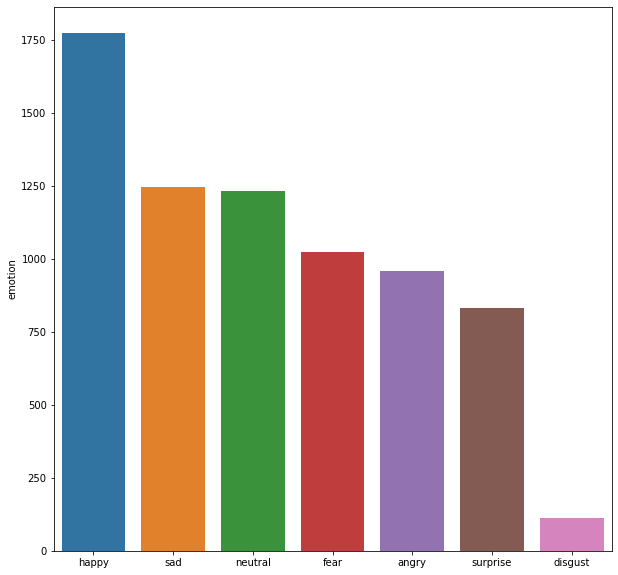

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(x = df.emotion.value_counts().index, y = df.emotion.value_counts())

In [18]:
pip install keras

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
df['emotion'].replace(['happy', 'sad', 'neutral', 'fear', 'angry', 'surprise', 'disgust'],[0,1,2,3,4,5,6], inplace = True)
df.emotion.value_counts()

0    1774
1    1247
2    1233
3    1024
4     958
5     831
6     111
Name: emotion, dtype: int64

In [27]:
def reshape_date(x):
  return x.reshape(48, 48)


In [28]:
df['pixels'] = df['pixels'].apply(lambda x: reshape_date(x))

In [ ]:
df.shape

(7178, 3)

In [29]:
X = df['pixels']
y = to_categorical(df['emotion'])

In [30]:
X[0]

array([[253, 251, 254, ..., 105,  97,  69],
       [255, 253, 252, ..., 100, 104,  72],
       [252, 251, 253, ...,  94, 105,  81],
       ...,
       [251, 234, 178, ..., 190, 196, 199],
       [254, 226, 179, ..., 187, 194, 198],
       [254, 207, 167, ..., 190, 192, 195]], dtype=uint8)

In [31]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [32]:
X = np.stack(X, axis = 0)

In [33]:

X = X.reshape(7178, 48, 48, 1)

print(X.shape, y.shape)

(7178, 48, 48, 1) (7178, 7)


In [34]:
X.shape

(7178, 48, 48, 1)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)

In [36]:
# image pre-processing
X_train = X_train/255
X_Test  = X_Test/255

In [37]:
X_train

array([[[[0.97254902],
         [0.96078431],
         [0.98431373],
         ...,
         [0.97254902],
         [0.97254902],
         [0.96862745]],

        [[0.95686275],
         [0.97254902],
         [0.94901961],
         ...,
         [0.97647059],
         [0.95686275],
         [0.96470588]],

        [[0.96470588],
         [0.98823529],
         [0.78039216],
         ...,
         [0.97254902],
         [0.96470588],
         [0.97647059]],

        ...,

        [[0.10980392],
         [0.13333333],
         [0.1372549 ],
         ...,
         [0.80784314],
         [0.81960784],
         [0.82745098]],

        [[0.12156863],
         [0.1372549 ],
         [0.21176471],
         ...,
         [0.81176471],
         [0.79607843],
         [0.81960784]],

        [[0.14509804],
         [0.14901961],
         [0.25098039],
         ...,
         [0.81960784],
         [0.81568627],
         [0.81568627]]],


       [[[0.88235294],
         [0.87058824],
         [0.88

In [14]:
def res_block(X, filter, stage):

  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [16]:
input_shape = (48, 48, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3, 3))(X_input)

# 1 - stage
X = Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides= (2, 2))(X)

# 2 - stage
X = res_block(X, filter= [64, 64, 256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128, 128, 512], stage= 3)

# 4 - stage
# X = res_block(X, filter= [256, 256, 1024], stage= 4)

# Average Pooling
X = AveragePooling2D((4, 4), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)

model_2_emotion = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model_2_emotion.summary()

ValueError: ignored

In [21]:
import numpy
import matplotlib.pyplot as plt

from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm

from keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

from keras.models import Sequential
from keras.layers import Dense

import keras

In [22]:
from tensorflow.keras.optimizers import SGD

In [55]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (48, 48, 1), padding = 'same', 
   activation = 'relu', kernel_constraint = maxnorm(3)))

model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same', 
   kernel_constraint = maxnorm(3)))

model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(512, activation = 'relu', kernel_constraint = maxnorm(3)))
model.add(Dropout(0.5))

model.add(Dense(7, activation = 'softmax'))



In [ ]:
# image pre-processing
X_train = X_train/255
X_Test  = X_Test/255
# X_train, X_Test, y_train, y_Test

In [43]:
y_train.shape[1]

7

In [56]:
# Compile model
epochs = 10
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr = lrate, momentum = 0.9, decay = decay, nesterov = False)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 dropout_6 (Dropout)         (None, 48, 48, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 18432)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               9437696   
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [48]:
monitor = 'val_loss', min_delta = 0, patience = 0, verbose = 0, mode = 'auto')]

SyntaxError: ignored

In [57]:

callbacks = [keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq = 0, batch_size = 32, write_graph = True, write_grads = False, 
                                         write_images = True, embeddings_freq = 0, embeddings_layer_names = None, 
                                         embeddings_metadata = None)]

In [ ]:
model.fit(X_train, y_train, epochs = 60, 
   batch_size = 32,shuffle = True,callbacks = callbacks)

Epoch 1/60
202/202 [==============================] - 68s 333ms/step - loss: 1.8236 - accuracy: 0.2401
Epoch 2/60
202/202 [==============================] - 67s 329ms/step - loss: 1.7540 - accuracy: 0.2833
Epoch 3/60
202/202 [==============================] - 68s 335ms/step - loss: 1.7091 - accuracy: 0.3147
Epoch 4/60
202/202 [==============================] - 66s 326ms/step - loss: 1.6680 - accuracy: 0.3424
Epoch 5/60
202/202 [==============================] - 66s 326ms/step - loss: 1.6334 - accuracy: 0.3607
Epoch 6/60
202/202 [==============================] - 66s 325ms/step - loss: 1.6085 - accuracy: 0.3714
Epoch 7/60
202/202 [==============================] - 66s 325ms/step - loss: 1.5739 - accuracy: 0.3950
Epoch 8/60
202/202 [==============================] - 66s 325ms/step - loss: 1.5494 - accuracy: 0.4031
Epoch 9/60
202/202 [==============================] - 66s 326ms/step - loss: 1.5254 - accuracy: 0.4203
Epoch 10/60
202/202 [==============================] - 66s 326ms/step - l

In [59]:
# Final evaluation of the model
scores = model.evaluate(X_train, y_train, verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 99.91%


In [60]:
# serialize model to JSONx
model_json = model.to_json()
with open("model_face.json", "w") as json_file:
   json_file.write(model_json)

In [61]:
# Final evaluation of the model
scores = model.evaluate(X_Test, y_Test, verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 40.11%
